# FOREX Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Pre-Processing</a></li>
<li><a href="#eda">Exploratory Analysis</a></li>
<li><a href="#view">Viewing Plotly Charts</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we will analyze historical forex data scraped from [myfxBook](https://www.myfxbook.com), a popular platform used by forex traders to connect and perform trade analysis. Our analysis will span between _January 2nd 2019_ and _September 30th 2022_, which is the date our data was scraped. It will focus on the OHLC prices for the major currency pairs, and a few cross currency pairs with the goal of detecting movements and trends in the market for the highlighted period.

*This project is __not__ meant to be a recommendation to trade any of the currency pairs from the trade analysis performed.*

In [1]:
# Import packages
import pandas as pd
import numpy as np

import plotly.offline as py
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in csv files
audjpy = pd.read_csv('AUDJPY.csv')
audusd = pd.read_csv('AUDUSD.csv')
eurjpy = pd.read_csv('EURJPY.csv')
eurusd = pd.read_csv('EURUSD.csv')
gbpusd = pd.read_csv('GBPUSD.csv')
nzdusd = pd.read_csv('NZDUSD.csv')
usdcad = pd.read_csv('USDCAD.csv')
usdchf = pd.read_csv('USDCHF.csv')
usdjpy = pd.read_csv('USDJPY.csv')
xauusd = pd.read_csv('XAUUSD.csv')

In [3]:
# Preview a dataframe
eurjpy

Date                   Open     High        Low    Close  \
0    Sep 29, 2022 00:00                140.279  141.756  139.43200  141.722   
1    Sep 28, 2022 00:00                138.852  140.398  138.05600  140.332   
2    Sep 27, 2022 00:00                139.036  139.543  138.61300  138.929   
3    Sep 26, 2022 00:00                138.813  139.519  137.35600  139.058   
4    Sep 23, 2022 00:00                140.001  140.256  138.66500  138.859   
..                  ...                    ...      ...        ...      ...   
971  Jan 03, 2019 00:00                123.518  123.567  118.62500  122.651   
972  Jan 02, 2019 00:00                125.698  125.848  123.52200  123.546   
973                 NaN  Personal Spending MoM   32 min        NaN      NaN   
974                 NaN                    NaN      NaN        NaN      NaN   
975             0.97445                1.10311  144.615    1.37395      NaN   

     Change (Pips)  
0            144.3  
1            148.0  
2            -10.7  
3             24.5  
4           -114.2  
..             ...  
971          -86.7  
972         -215.2  
973            NaN  
974            NaN  
975            NaN  

[976 rows x 6 columns]

<a id='wrangling'></a>
## Data Pre-Processing
> Preliminary wrangling before exploratory data analysis.

In [4]:
# Drop last three rows from all dataframes
dfs = [audjpy, audusd, eurjpy, eurusd, gbpusd, nzdusd, usdcad, usdchf, usdjpy, xauusd]
for df in dfs:
    df.drop(df[-3:].index, inplace=True)

In [5]:
# Convert columns to float datatype
float_vars = ['Open', 'High', 'Low', 'Close', 'Change (Pips)']
for df in dfs:
    for var in float_vars:
        df[var] = df[var].astype(float)

In [6]:
# Assign currency pair column to dataframes
audjpy['Currency Pair'] = 'AUDJPY'
audusd['Currency Pair'] = 'AUDUSD'
eurjpy['Currency Pair'] = 'EURJPY'
eurusd['Currency Pair'] = 'EURUSD'
gbpusd['Currency Pair'] = 'GBPUSD'
nzdusd['Currency Pair'] = 'NZDUSD'
usdcad['Currency Pair'] = 'USDCAD'
usdchf['Currency Pair'] = 'USDCHF'
usdjpy['Currency Pair'] = 'USDJPY'
xauusd['Currency Pair'] = 'XAUUSD'

In [7]:
# Convert date column to date datatype
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Concatenate dataframes into one dataframe
fx = pd.concat(dfs, ignore_index=True)

In [9]:
# Preview new dataframe
print(fx.shape)
print(fx.dtypes)
print(fx.describe())
fx.sample(2)

(9725, 7)
Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Change (Pips)           float64
Currency Pair            object
dtype: object
              Open         High          Low        Close  Change (Pips)
count  9725.000000  9725.000000  9725.000000  9725.000000    9725.000000
mean    200.610804   201.954980   199.317757   200.676722       7.814386
std     501.295423   504.930567   497.706226   501.411434     517.803346
min       0.562900     0.572150     0.546910     0.563320  -11529.000000
25%       0.948430     0.952720     0.944670     0.948400     -29.100000
50%       1.304620     1.309090     1.300450     1.304770       3.800000
75%     109.367000   109.682000   109.128000   109.375000      37.700000
max    2063.590000  2075.210000  2034.470000  2063.110000    7055.000000


Date     Open     High      Low    Close  Change (Pips)  \
6552 2019-12-31  1.30685  1.30690  1.29515  1.29895          -79.0   
4691 2019-09-02  1.21441  1.21748  1.20361  1.20627          -81.4   

     Currency Pair  
6552        USDCAD  
4691        GBPUSD

In [10]:
# Check for duplicated index
fx[fx.index.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Change (Pips), Currency Pair]
Index: []

In [11]:
# Check for duplicates and null values
print(fx.isnull().any())
print(fx.duplicated().any())

Date             False
Open             False
High             False
Low              False
Close            False
Change (Pips)    False
Currency Pair    False
dtype: bool
False


<a id='eda'></a>
## Exploratory Analysis

- How have opening and closing prices changed over the time period for all currency pairs?

Considering the large difference in price value for certain pairs, we will analyze in groups. First for Gold, then JPY pairs, Australian/New Zealand pairs, and then, other currency pairs.

In [12]:
# Subset dataframe to criteria
jpy_fx = fx[fx['Currency Pair'].str.contains('JPY')]
xau_fx = fx[fx['Currency Pair'].str.contains('XAU')]
oceania_fx = fx[fx['Currency Pair'].str.contains('AUDUSD|NZD')]
other_fx = fx[~fx['Currency Pair'].str.contains('JPY|XAU|AUD|NZD')]

In [13]:
# Define function to get opening price and closing price movements
def line_plot(data, opening='Opening', closing='Closing'):
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    sns.lineplot(data=data, x='Date', y='Open', hue='Currency Pair')
    plt.title(str(opening) + ' Prices for Currency Pair', fontsize=15)
    plt.legend(bbox_to_anchor=(1,0.5));

    plt.subplot(2,1,2)
    sns.lineplot(data=data, x='Date', y='Close', hue='Currency Pair')
    plt.title(str(closing) + ' Prices for Currency Pair', fontsize=15)
    plt.legend(bbox_to_anchor=(1,0.5));

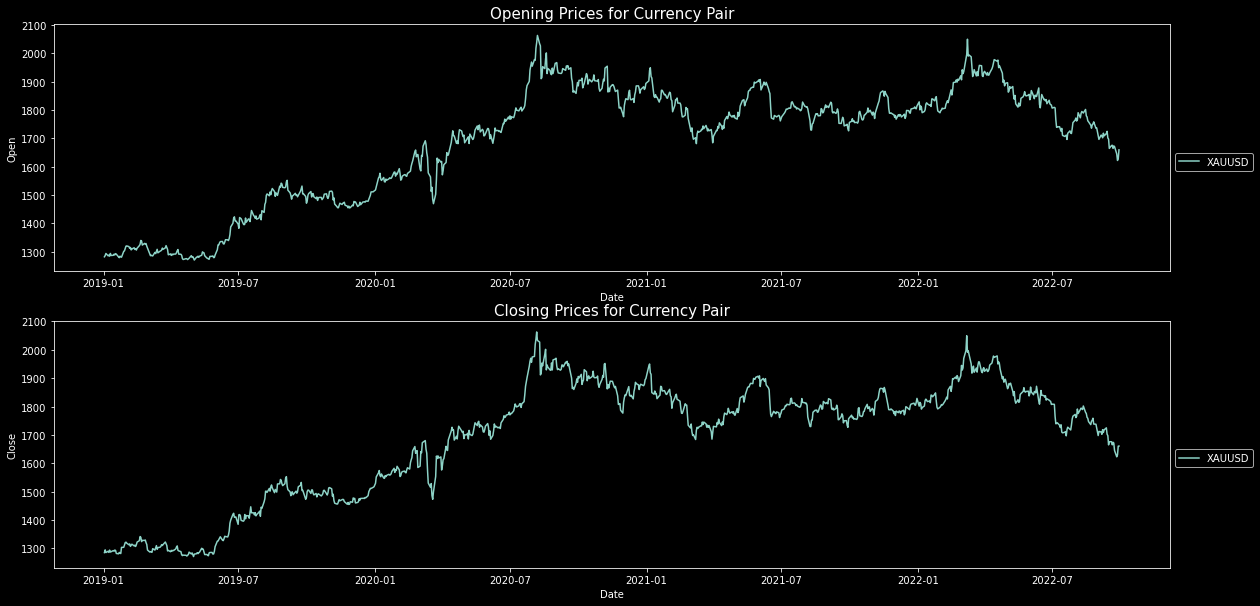

In [14]:
# Distribution of opening and closing prices for Gold
line_plot(xau_fx)

The Gold market is extremely volatile and highly reactive to certain global events. We see a bullish movement from mid 2019 till about August 2020 when the market peaked close to 2100, and then there is a reversal in the trend.

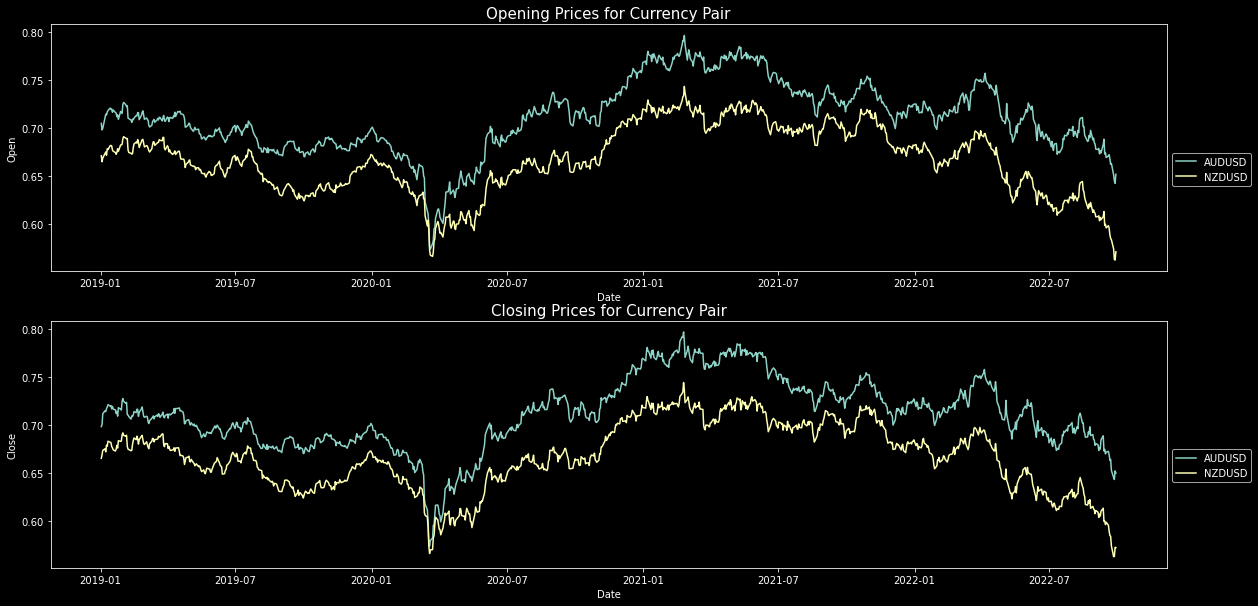

In [15]:
# Distribution of opening and closing prices for AUD/NZD currency pairs
line_plot(oceania_fx)

The New Zealand and Australian dollars seem to have similar trends against the US dollar. Both currencies were strongest around March 2021, but are currently in a bearish trend, dropping so low only as they did around March 2020.

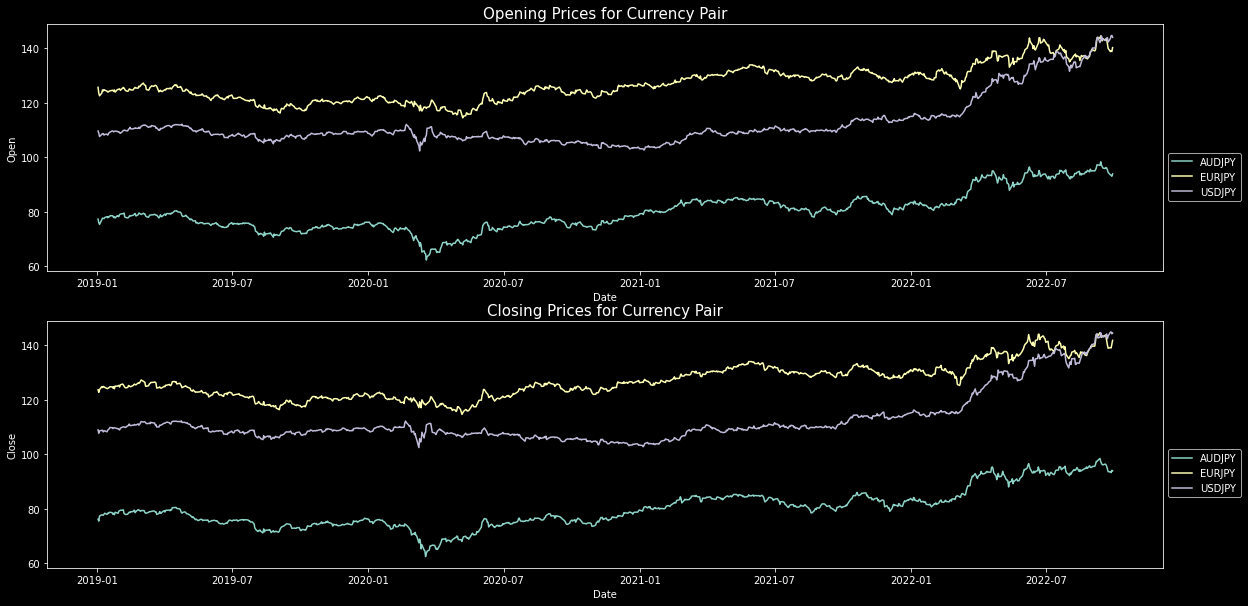

In [16]:
# Distribution of opening and closing prices for JPY currency pairs
line_plot(jpy_fx)

For the most part, the Yen crosses ranged, and the market shows a gradual and steady bullish movement against the Yen for all three pairs from around January 2021.

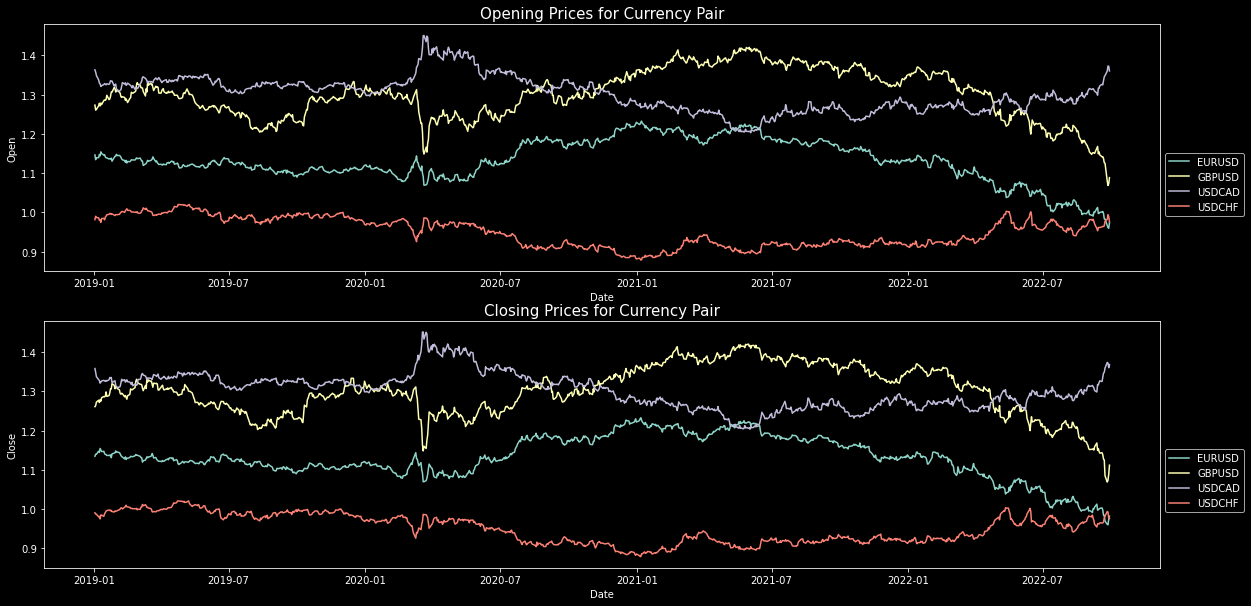

In [17]:
# Distribution of opening and closing prices for other pairs
line_plot(other_fx)

The most liquid pairs, EURUSD and GBPUSD seem to have similar trends for the most part, however, we see a steady bearish trend for both pairs since mid 2021 to date. We see the US dollars was strong around March 2020, and while the Swiss Franc currently seems to be ranging, the Canadian dollars appears to be slightly bullish.

Closing prices tend to differ from opening prices as a result of market fluctuations, however from our analysis, there are no discernable differences in closing and opening prices of our currency pairs.

* How have the currency pairs moved over time by moving averages?

In [18]:
# Define function to plot moving averages
currencies = list(fx['Currency Pair'].unique())
def get_moving_avg(currency):
    if currency in currencies:
        curr = fx[fx['Currency Pair'] == currency]
    curr['Moving Average 1'] = curr['Close'].rolling(50).mean()
    curr['Moving Average 2'] = curr['Close'].rolling(100).mean()

    plt.figure(figsize=(20,5))
    pos = ['2019-01-01', '2019-07-01', '2020-01-01', '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01']
    sns.lineplot(data=curr, x='Date', y='Close', label='Closing Price')
    sns.lineplot(data=curr, x='Date', y='Moving Average 1', label='Moving Average 1')
    sns.lineplot(data=curr, x='Date', y='Moving Average 2', label='Moving Average 2')
    plt.xticks(pos, pos)
    plt.ylabel('Price')
    plt.title(str(currency) + ' - Moving Averages vs Closing Price')
    plt.legend()
    plt.show();
    plt.figure(figsize=(20,2))
    sns.lineplot(data=curr, x='Date', y='Change (Pips)', label='Pip Change', alpha=0.25) # plot changes in pips

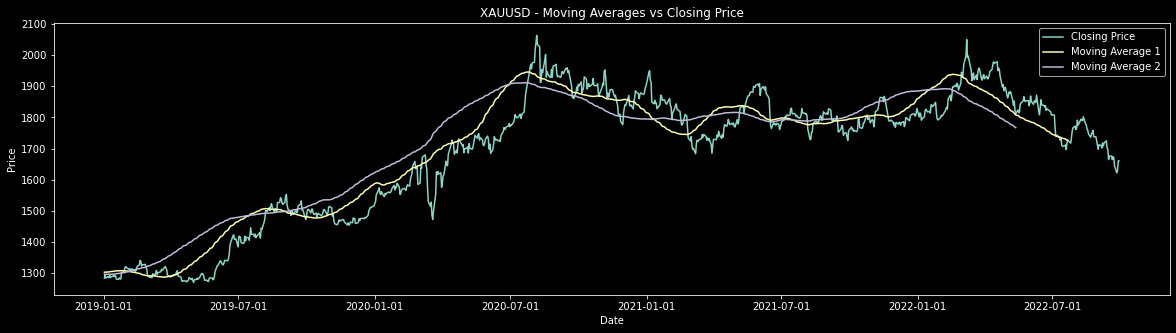

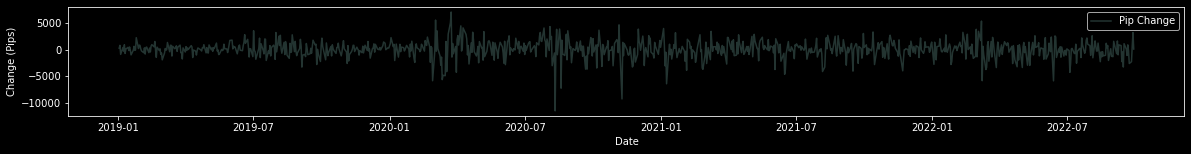

In [19]:
# Moving averages for Gold
get_moving_avg('XAUUSD')

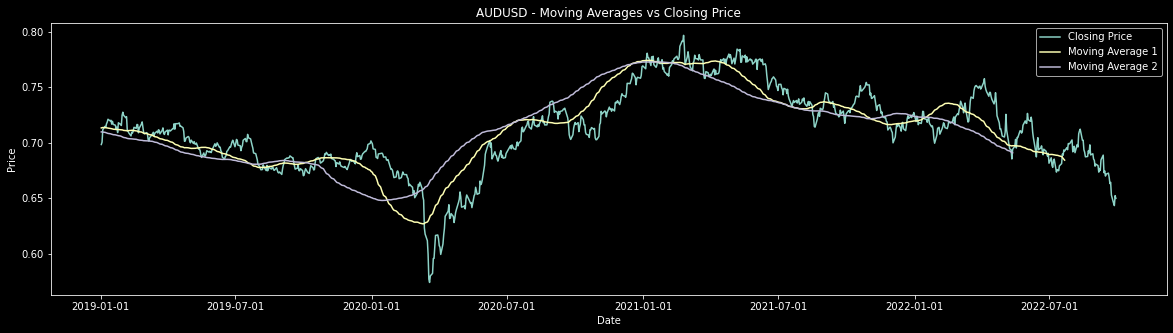

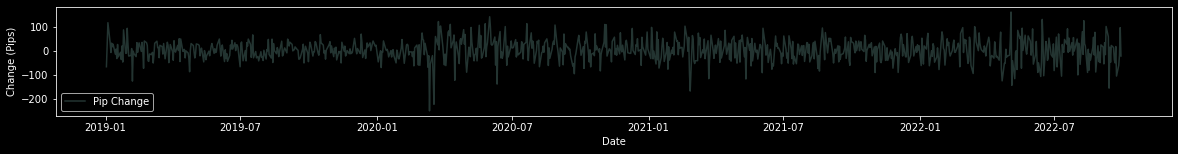

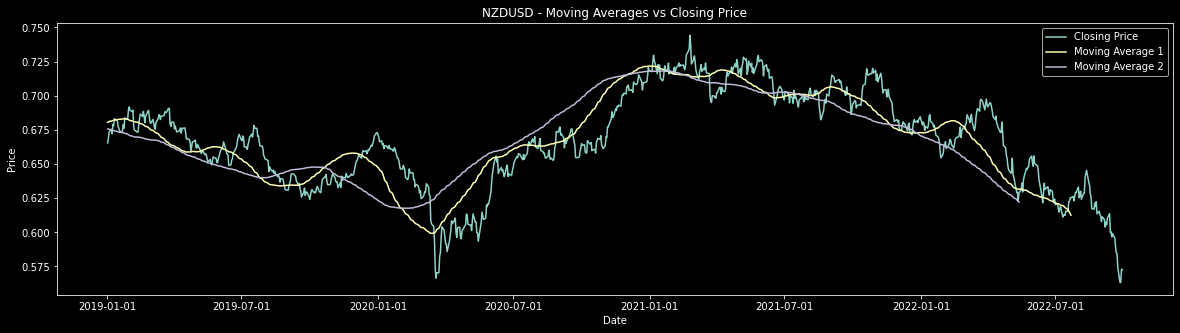

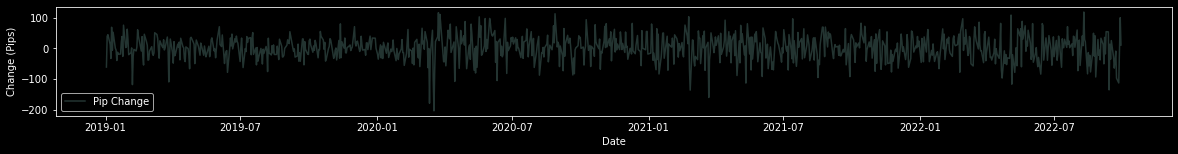

In [20]:
# Moving averages for AUD/NZD pairs
get_moving_avg('AUDUSD')
get_moving_avg('NZDUSD')

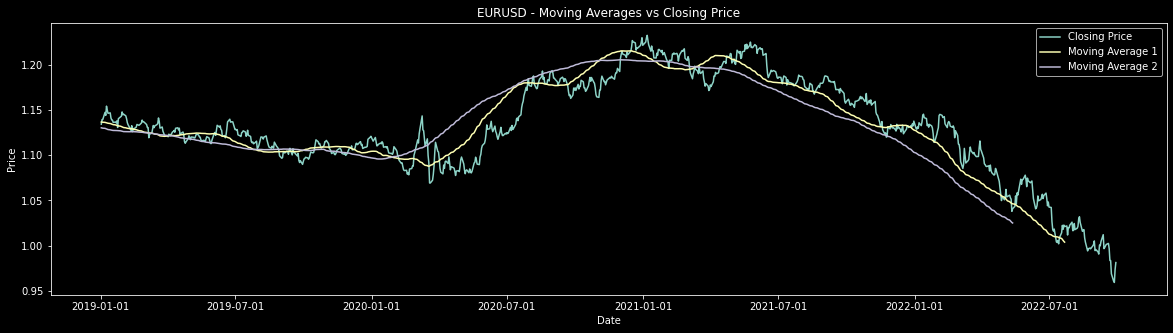

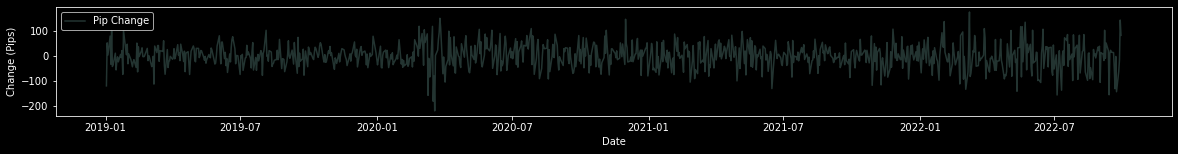

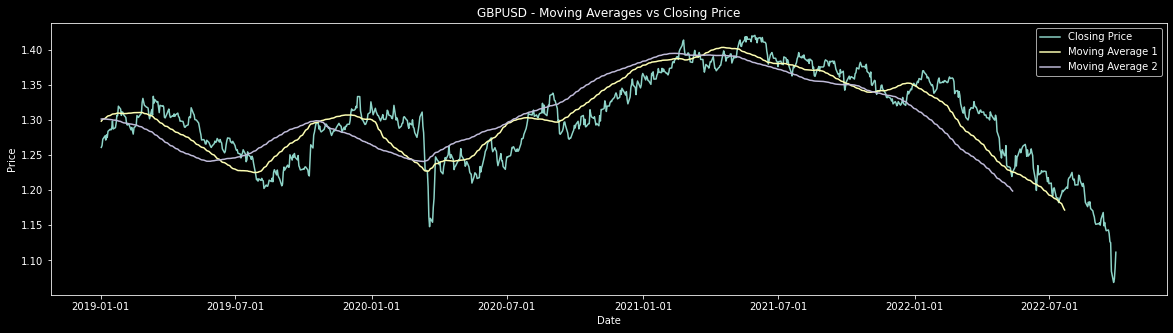

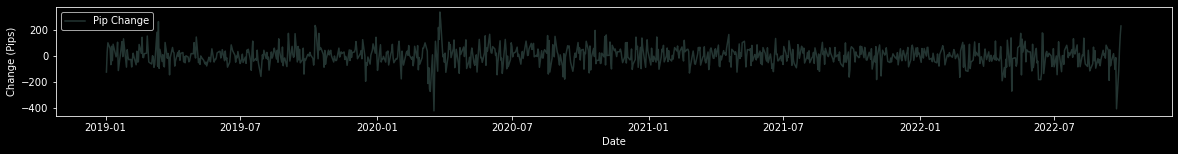

In [21]:
# Moving averages for EURUSD and GBPUSD pairs
get_moving_avg('EURUSD')
get_moving_avg('GBPUSD')

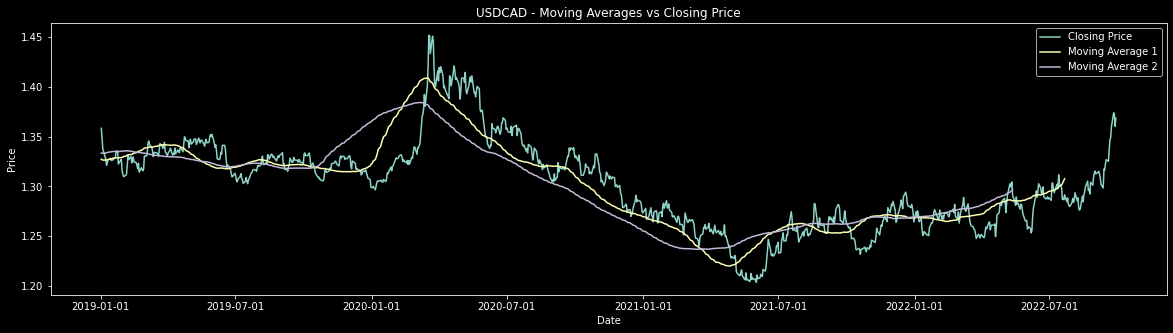

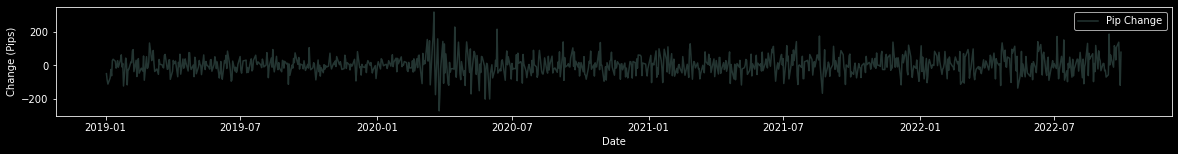

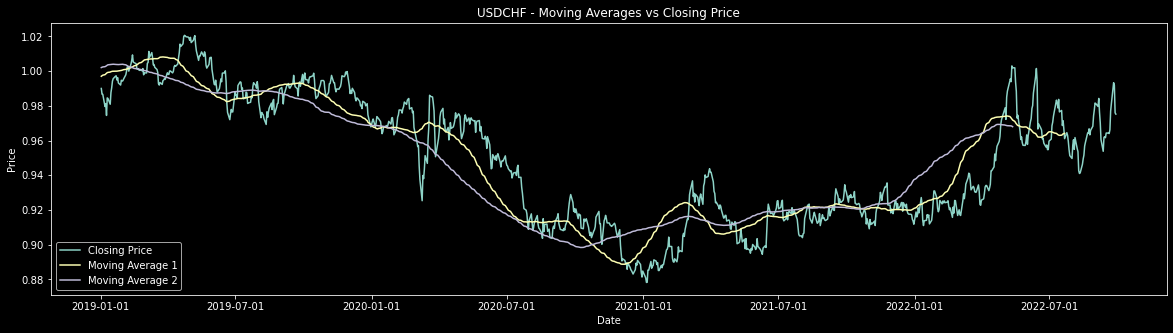

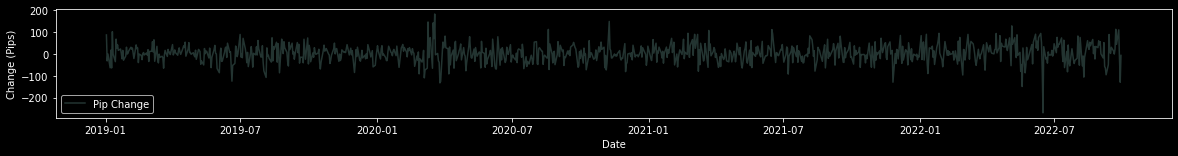

In [22]:
# Moving averages for USDCAD and USDCHF pairs
get_moving_avg('USDCAD')
get_moving_avg('USDCHF')

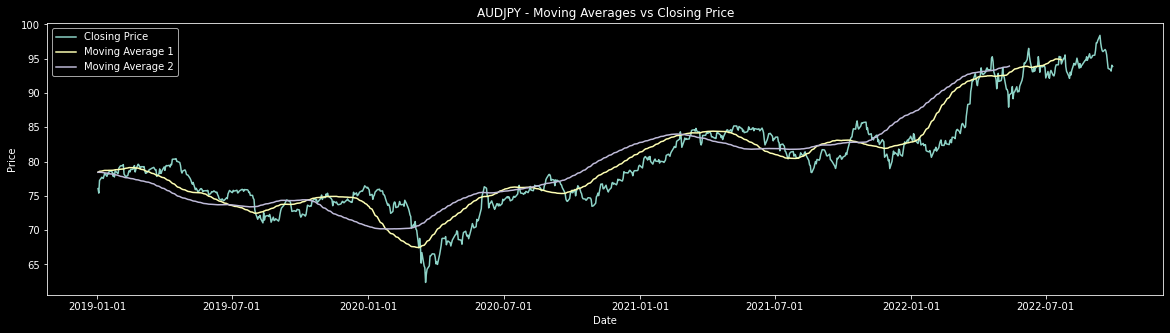

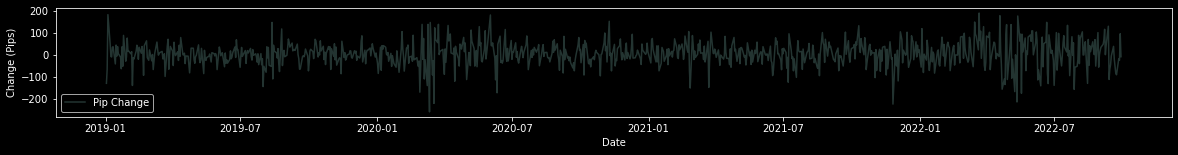

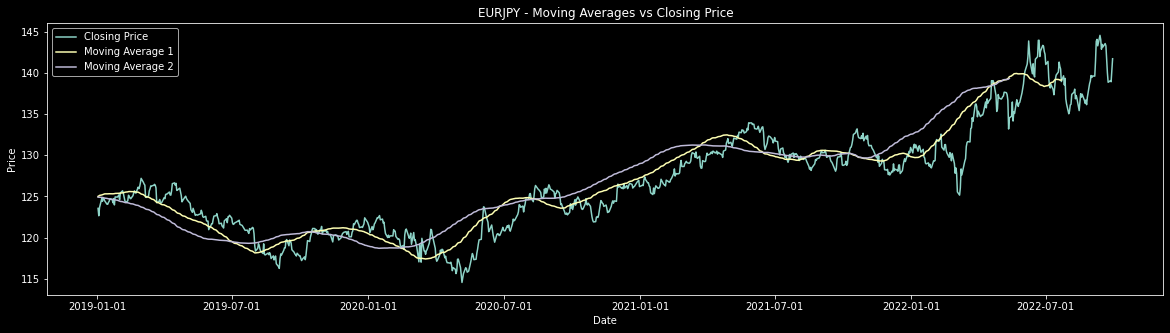

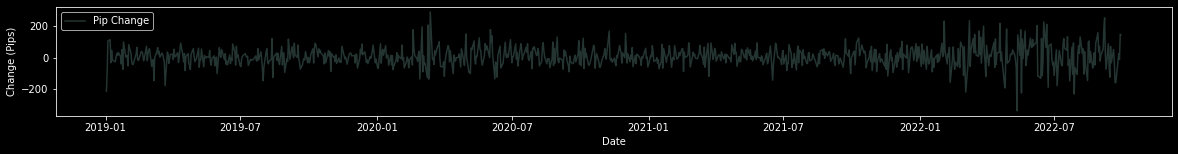

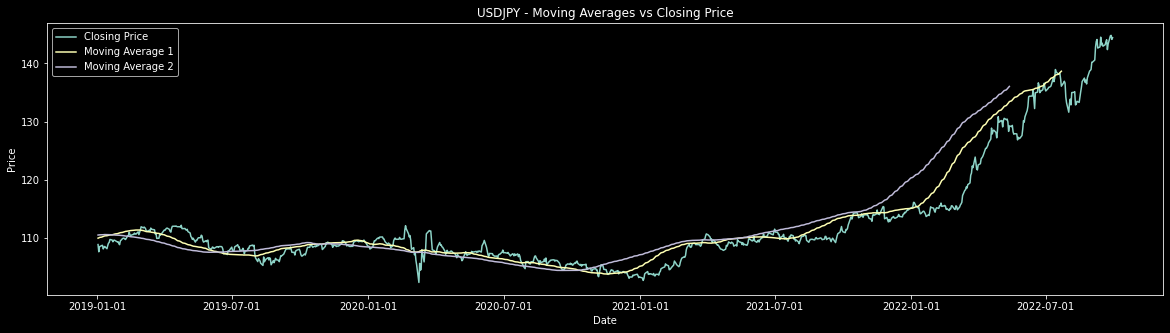

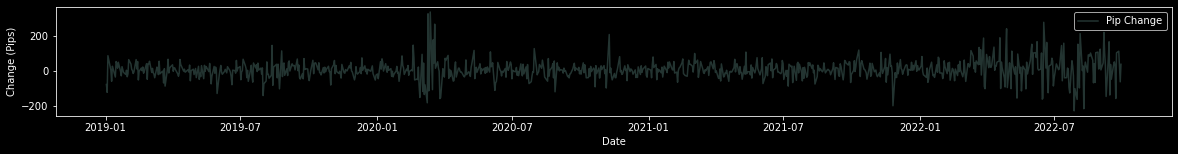

In [23]:
# Moving averages for JPY pairs
get_moving_avg('AUDJPY')
get_moving_avg('EURJPY')
get_moving_avg('USDJPY')

Moving averages is one of the technical indicators used by traders in trade analysis to determine the potential direction of trends and increase the chances of profitable trades. The price data in the charts seem to be smoothened with the moving averages, defining the current market direction more clearly. In the pips window, we see significant pip changes around March 2020 for all currencies paired with the US dollars.

- How are the price movements with candlestick charts?

In [24]:
# Define function to plot candlestick charts
currencies = list(fx['Currency Pair'].unique())
def get_candlestick(currency):
    if currency in currencies:
        curr = fx[fx['Currency Pair'] == currency]
    data = [go.Candlestick(x=curr['Date'], open=curr['Open'], high=curr['High'], low=curr['Low'], close=curr['Close'])]
    layout = go.Layout(title=str(currency) + ' Candlestick with Range Slider',
                       xaxis = {'rangeselector':{'buttons':[{'count':7, 'label':'1w', 'step':'day', 'stepmode':'backward'},
                                                          {'count':1, 'label':'1m', 'step':'month', 'stepmode':'backward'},
                                                          {'count':3, 'label':'3m', 'step':'month', 'stepmode':'backward'},
                                                          {'count':6, 'label':'6m', 'step':'month', 'stepmode':'backward'},
                                                          {'count':1, 'label':'1y', 'step':'year', 'stepmode':'backward'}]},
                       'rangeslider':{'visible':True}}, template='plotly_dark', xaxis_rangeselector_font_color='white',
                  xaxis_rangeselector_activecolor='red', xaxis_rangeselector_bgcolor='green')
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='candlestick_chart');

<a id='view'></a>
## Viewing Plotly Charts
To view all interactive charts used in this project, go to [Jupyter Notebook Viewer](https://nbviewer.org/) and paste the url of this [notebook](https://github.com/owhonda-moses/Forex_Web_Scraping_and_Analysis/blob/master/forex_analysis.ipynb).

In [25]:
# AUDJPY candlestick chart
get_candlestick('AUDJPY')

In [26]:
# AUDUSD candlestick chart
get_candlestick('AUDUSD')

In [27]:
# EURJPY candlestick chart
get_candlestick('EURJPY')

In [28]:
# EURUSD candlestick chart
get_candlestick('EURUSD')

In [29]:
# GBPUSD candlestick chart
get_candlestick('GBPUSD')

In [30]:
# NZDUSD candlestick chart
get_candlestick('NZDUSD')

In [31]:
# USDCAD candlestick chart
get_candlestick('USDCAD')

In [32]:
# USDCHF candlestick chart
get_candlestick('USDCHF')

In [33]:
# USDJPY candlestick chart
get_candlestick('USDJPY')

In [34]:
# XAUUSD candlestick chart
get_candlestick('XAUUSD')

_Here is a screenshot of one of the candlestick charts to enable you view it on GitHub:_

<img src="https://github.com/owhonda-moses/Forex_Web_Scraping_and_Analysis/blob/62d51078e184ade8a3d8cf23aa72099f620c9d91/image/candlestick.JPG?raw=true" width="1100" height="1100" />

Candlestick charts give a more clearer insight into the market sentiment. Green candlesticks indicate that price closed higher than it opened, and red candlesticks indicate the opposite. Zooming into the data using the range selector and slider, we see more clearly the bullish and bearish sentiment of traders, and by observing the candles, we can identify certain patterns indicative of market turning points or trend reversals. Currently, the US dollars appears to be having a good run against other major currencies including Gold, however other trading strategies should also be explored to affirm a long position on the dollar.

- What are the mean OHLC prices for all currency pairs?

In [35]:
# Get mean values for price variables
df_fx = fx.groupby('Currency Pair').agg({'Open':np.mean, 'High':np.mean, 'Low':np.mean, 'Close':np.mean}).reset_index()
df_fx

Currency Pair         Open         High          Low        Close
0        AUDJPY    79.899313    80.357716    79.513444    79.965498
1        AUDUSD     0.711152     0.714778     0.707905     0.711385
2        EURJPY   126.796380   127.308849   126.369427   126.860039
3        EURUSD     1.131191     1.135042     1.127629     1.131202
4        GBPUSD     1.300905     1.306641     1.295599     1.301147
5        NZDUSD     0.666843     0.670346     0.663843     0.667082
6        USDCAD     1.302051     1.306684     1.298095     1.302276
7        USDCHF     0.949167     0.952629     0.946312     0.949452
8        USDJPY   112.412039   112.814588   112.064380   112.478393
9        XAUUSD  1688.585320  1700.684112  1676.783254  1689.049112

In [36]:
# Plot chart to show mean prices for all currency pairs
fig = px.line(df_fx, x='Currency Pair', y=['Open', 'High', 'Low', 'Close'])
fig.update_layout(template='plotly_dark', yaxis_title = 'Price', title = 'Mean Prices of Currency Pairs', hovermode='x', title_x=0.5)

_Here is a screenshot of the chart to enable you view it on GitHub:_

<img src="https://github.com/owhonda-moses/Forex_Web_Scraping_and_Analysis/blob/62d51078e184ade8a3d8cf23aa72099f620c9d91/image/mean_prices.JPG?raw=true" width="1100" height="900" />

The mean OHLC prices fall within a small range for each currency pair resulting in parallel and symmetric lines. From this chart, we see the Yen appears stronger against the Australian dollar than against other Yen pairs. While majority of the currency pairs average between 0 to 1.2, Gold OHLC prices seem to average around 1680 to 1690.

In [37]:
# Store working dataframe as csv
fx.to_csv('forex_data.csv', index=False, encoding='utf-8')

<a id='conclusions'></a>
## Conclusions

> From the insights gathered:
- Gold peaked close to 2100 around August 2020 and currently appears to be in a bearish trend. Gold however is highly volatile and should be traded with multiple effective trading strategies, whether scalping or trading long term.
- The Euro, Pounds and Gold have been on a steady decline against the dollar most notably from March 2022, which could be attributed to the ongoing war in Ukraine and economic sanctions placed on Russia.
- Moving averages presented smoother price action that gave a clearer picture of the market trend, but considering that it is a lagging indicator, it's probably best not to use it as a sole technical indicator to predict future trends. We see a cross of the moving averages preceding the bullish run of the US dollars to it's highest point around March 2020.
- The candlestick charts gave better and easy-to-interprete visuals of the market sentiment, and from observing the candlestick patterns, we see that the US dollars is currently growing on other major currency pairs. While this might nudge traders to go long on the dollar, it should be verified by analyzing with other technical indicators.

[View web scraping notebook](https://github.com/owhonda-moses/Forex_Web_Scraping_and_Analysis/blob/master/forex_web_scraping.ipynb)